# Monetary Economics: Chapter 4

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

import matplotlib.pyplot as plt

from pysolve3.model import Model
from pysolve3.utils import is_close,round_solution


### Model PC

In [2]:
def create_pc_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by the government')
    model.var('C', desc='Consumption goods')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('R', desc='Interest rate on government bills')
    model.var('T', desc='Taxes')
    model.var('V', desc='Household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')

    model.param('alpha1', desc='Propensity to consume out of income', default=0.6)
    model.param('alpha2', desc='Propensity to consume out of wealth', default=0.4)
    model.param('lambda0', desc='Parameter in asset demand function', default=0.635)
    model.param('lambda1', desc='Parameter in asset demand function', default=5.0)
    model.param('lambda2', desc='Parameter in asset demand function', default=0.01)
    model.param('theta', desc='Tax rate', default=0.2)

    model.param('G', desc='Government goods', default=20.)
    model.param('Rbar', desc='Interest rate as policy instrument')
    
    model.add('Y = C + G')  # 4.1
    model.add('YD = Y - T + R(-1)*Bh(-1)')  # 4.2
    model.add('T = theta*(Y + R(-1)*Bh(-1))')  #4.3, theta < 1
    model.add('V = V(-1) + (YD - C)')  # 4.4
    model.add('C = alpha1*YD + alpha2*V(-1)')  # 4.5, 0<alpha2<alpha1<1
    model.add('Hh = V - Bh')  # 4.6
    model.add('Bh = V*lambda0 + V*lambda1*R - lambda2*YD') # 4.7
    model.add('Bs - Bs(-1) = (G + R(-1)*Bs(-1)) - (T + R(-1)*Bcb(-1))')  # 4.8
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')  # 4.9
    model.add('Bcb = Bs - Bh')  # 4.10
    model.add('R = Rbar')  # 4.11
        
    return model


In [3]:
steady = create_pc_model()
steady.set_values({'alpha1': 0.6,
                   'alpha2': 0.4,
                   'lambda0': 0.635,
                   'lambda1': 5.0,
                   'lambda2': 0.01,
                   'G': 20,
                   'Rbar': 0.025})
for _ in range(100):
    steady.solve(iterations=100, threshold=1e-5)
    if is_close(steady.solutions[-2], steady.solutions[-1], atol=1e-4):
        break

### Model PCEX

In [4]:
def create_pcex_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by the government')
    model.var('C', desc='Consumption goods')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('R', desc='Interest rate on government bills')
    model.var('T', desc='Taxes')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')
    model.var('YDe', desc='Expected disposable income of households')

    model.set_param_default(0)
    model.param('alpha1', desc='Propensity to consume out of income', default=0.6)
    model.param('alpha2', desc='Propensity to consume o of wealth', default=0.4)
    model.param('lambda0', desc='Parameter in asset demand function', default=0.635)
    model.param('lambda1', desc='Parameter in asset demand function', default=5.0)
    model.param('lambda2', desc='Parameter in asset demand function', default=0.01)
    model.param('theta', desc='Tax rate', default=0.2)

    model.param('G', desc='Government goods', default=20.)
    model.param('Ra', desc='Random shock to expectations', default=0.0)
    model.param('Rbar', desc='Interest rate as policy instrument', default=0.025)

    model.add('Y = C + G')  # 4.1
    model.add('YD = Y - T + R(-1)*Bh(-1)')  # 4.2
    model.add('T = theta*(Y + R(-1)*Bh(-1))')  #4.3, theta < 1
    model.add('V = V(-1) + (YD - C)')  # 4.4
    model.add('C = alpha1*YDe + alpha2*V(-1)')  # 4.5E
    model.add('Bd = Ve*lambda0 + Ve*lambda1*R - lambda2*YDe')  # 4.7E
    model.add('Hd = Ve - Bd')  # 4.13
    model.add('Ve = V(-1) + (YDe - C)')  # 4.14
    model.add('Hh = V - Bh')  # 4.6
    model.add('Bh = Bd')  # 4.15
    model.add('Bs - Bs(-1) = (G + R(-1)*Bs(-1)) - (T + R(-1)*Bcb(-1))')  # 4.8
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')  # 4.9
    model.add('Bcb = Bs - Bh')  # 4.10
    model.add('R = Rbar')  # 4.11
    model.add('YDe = YD * (1 + Ra)')  # 4.16
        
    return model


### Steady state and shocks

In [5]:
pcex_steady = create_pcex_model()
pcex_steady.set_values([('alpha1', 0.6),
                        ('alpha2', 0.4),
                        ('lambda0', 0.635),
                        ('lambda1', 5.0),
                        ('lambda2', 0.01),
                        ('theta', 0.2),
                        ('G', 20),
                        ('Rbar', 0.025),
                        ('Ra', 0),
                        ('Bcb', 116.36),
                        ('Bh', 363.59),
                        ('Bs', 'Bh + Bcb'),
                        ('Hh', 116.35),
                        ('Hs', 'Hh'),
                        ('V', 'Bh + Hh'),
                        ('R', 'Rbar')])
for _ in range(100):
    pcex_steady.solve(iterations=100, threshold=1e-5)

    if is_close(pcex_steady.solutions[-2], pcex_steady.solutions[-1], atol=1e-4):
        break

In [6]:
import random

random.seed(6)

shocks = create_pcex_model()
shocks.set_values(pcex_steady.solutions[-1], ignore_errors=True)

for _ in range(50):
    shocks.parameters['Ra'].value = random.gauss(0,1) / 10.
    shocks.solve(iterations=100, threshold=1e-3)


#### Figure 4.1

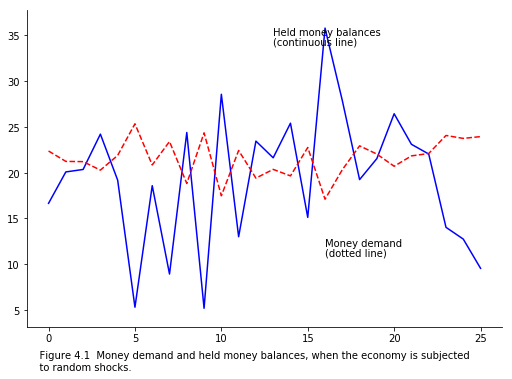

In [7]:
caption = '''
    Figure 4.1  Money demand and held money balances, when the economy is subjected
    to random shocks.'''
hddata = [s['Hd'] for s in shocks.solutions[25:]]
hhdata = [s['Hh'] for s in shocks.solutions[25:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(min(hddata+hhdata)-2, max(hddata+hhdata)+2)

axes.plot(hhdata, 'b')
axes.plot(hddata, linestyle='--', color='r')

# add labels
plt.text(13, 35, 'Held money balances')
plt.text(13, 34, '(continuous line)')
plt.text(16, 12, 'Money demand')
plt.text(16, 11, '(dotted line)')
fig.text(0.1, -.05, caption);

###### Figure 4.2

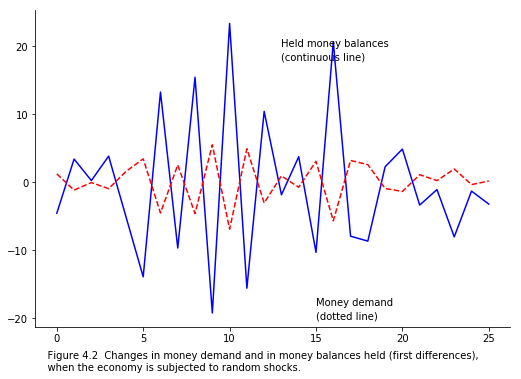

In [8]:
caption = '''
    Figure 4.2  Changes in money demand and in money balances held (first differences),
    when the economy is subjected to random shocks. '''
hddata = [s['Hd'] for s in shocks.solutions[24:]]
hhdata = [s['Hh'] for s in shocks.solutions[24:]]
for i in range(len(hddata)-1, 0, -1):
    hddata[i] -= hddata[i-1]
    hhdata[i] -= hhdata[i-1]
hddata = hddata[1:]
hhdata = hhdata[1:]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(min(hddata+hhdata)-2, max(hddata+hhdata)+2)

axes.plot(hhdata, 'b')
axes.plot(hddata, linestyle='--', color='r')

# add labels
plt.text(13, 20, 'Held money balances')
plt.text(13, 18, '(continuous line)')
plt.text(15, -18, 'Money demand')
plt.text(15, -20, '(dotted line)')
fig.text(0.1, -.05, caption);

### Scenario: Model PC, Steady state with increase in interest rate

In [9]:
rate_shock = create_pc_model()
rate_shock.set_values({'Bcb': 21.576,
                       'Bh': 64.865,
                       'Bs': 86.441,
                       'Hh': 21.62,
                       'Hs': 21.62,
                       'V': 86.485,
                       'alpha1': 0.6,
                       'alpha2': 0.4,
                       'lambda0': 0.635,
                       'lambda1': 5.0,
                       'lambda2': 0.01,
                       'G': 20,
                       'Rbar': 0.025})
# solve until stable
for i in range(50):
    rate_shock.solve(iterations=100, threshold=1e-5)
    if is_close(rate_shock.solutions[-2], rate_shock.solutions[-1], atol=1e-4):
        break

rate_shock.parameters['Rbar'].value = 0.035

for i in range(40):
    rate_shock.solve(iterations=100, threshold=1e-5)


###### Figure 4.3

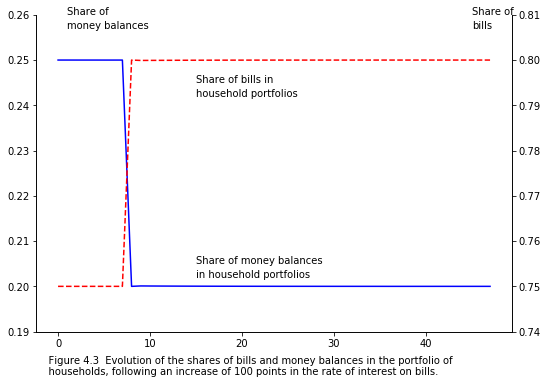

In [10]:
caption = '''
    Figure 4.3  Evolution of the shares of bills and money balances in the portfolio of
    households, following an increase of 100 points in the rate of interest on bills.'''

hhdata = [s['Hh']/s['V'] for s in rate_shock.solutions[15:]]
bhdata = [s['Bh']/s['V'] for s in rate_shock.solutions[15:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False)
axes.spines['top'].set_visible(False)
axes.set_ylim(0.19, 0.26)

axes.plot(hhdata, 'b')

axes2 = axes.twinx()
axes2.tick_params(top=False)
axes2.spines['top'].set_visible(False)
axes2.set_ylim(0.74, 0.81)
axes2.plot(bhdata, linestyle='--', color='r')

plt.text(1, 0.81, 'Share of')
plt.text(1, 0.807, 'money balances')
plt.text(45, 0.81, 'Share of')
plt.text(45, 0.807, 'bills')
plt.text(15, 0.795, 'Share of bills in')
plt.text(15, 0.792, 'household portfolios')
plt.text(15, 0.755, 'Share of money balances')
plt.text(15, 0.752, 'in household portfolios')
fig.text(0.1, -.05, caption);


###### Figure 4.4

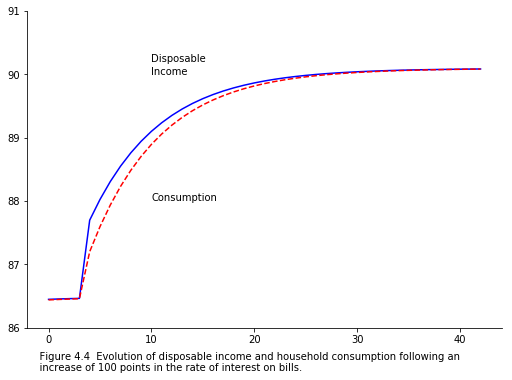

In [11]:
caption = '''
    Figure 4.4  Evolution of disposable income and household consumption following an
    increase of 100 points in the rate of interest on bills. '''
yddata = [s['YD'] for s in rate_shock.solutions[20:]]
cdata = [s['C'] for s in rate_shock.solutions[20:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(86, 91)

axes.plot(yddata, 'b')
axes.plot(cdata, linestyle='--', color='r')

# add labels
plt.text(10, 90.2, 'Disposable')
plt.text(10, 90.0, 'Income')
plt.text(10, 88, 'Consumption')
fig.text(0.1, -0.05, caption);


### Model PCEX1

In [12]:
def create_pcex1_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by the government')
    model.var('C', desc='Consumption goods')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('R', 'Interest rate on government bills')
    model.var('T', desc='Taxes')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')
    model.var('YDe', desc='Expected disposable income of households')

    model.set_param_default(0)
    model.param('alpha1', desc='Propensity to consume out of income', default=0.6)
    model.param('alpha2', desc='Propensity to consume o of wealth', default=0.4)
    model.param('lambda0', desc='Parameter in asset demand function', default=0.635)
    model.param('lambda1', desc='Parameter in asset demand function', default=5.0)
    model.param('lambda2', desc='Parameter in asset demand function', default=0.01)
    model.param('theta', desc='Tax rate', default=0.2)

    model.param('G', desc='Government goods', default=20.)
    model.param('Rbar', desc='Interest rate as policy instrument', default=0.025)
    
    model.add('Y = C + G')  # 4.1
    model.add('YD = Y - T + R(-1)*Bh(-1)')  # 4.2
    model.add('T = theta*(Y + R(-1)*Bh(-1))')  #4.3, theta < 1
    model.add('V = V(-1) + (YD - C)')  # 4.4
    model.add('C = alpha1*YDe + alpha2*V(-1)')  # 4.5E
    model.add('Bd = Ve*lambda0 + Ve*lambda1*R - lambda2*YDe')  # 4.7E
    model.add('Hd = Ve - Bd')  # 4.13
    model.add('Ve = V(-1) + (YDe - C)')  # 4.14
    model.add('Hh = V - Bh')  # 4.6
    model.add('Bh = Bd')  # 4.15
    model.add('Bs - Bs(-1) = (G + R(-1)*Bs(-1)) - (T + R(-1)*Bcb(-1))')  # 4.8
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')  # 4.9
    model.add('Bcb = Bs - Bh')  # 4.10
    model.add('R = Rbar')  # 4.11
    model.add('YDe = YD(-1)')  # 4.16A
        
    return model


In [13]:
pcex1 = create_pcex1_model()
pcex1.set_values({'Bcb': 21.576,
                  'Bh': 64.865,
                  'Bs': 86.441,
                  'Hh': 21.62,
                  'Hs': 21.62,
                  'V': 86.485,
                  'YD': 90,
                  'alpha1': 0.6,
                  'alpha2': 0.4,
                  'lambda0': 0.635,
                  'lambda1': 5.0,
                  'lambda2': 0.01,
                  'G': 20,
                  'Rbar': 0.025})
for i in range(10):
    pcex1.solve(iterations=100, threshold=1e-5)

pcex1.parameters['alpha1'].value = 0.7

for i in range(40):
    pcex1.solve(iterations=100, threshold=1e-5)


###### Figure 4.5

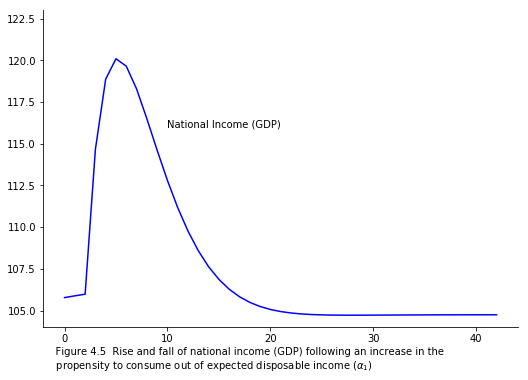

In [14]:
caption = '''
    Figure 4.5  Rise and fall of national income (GDP) following an increase in the
    propensity to consume out of expected disposable income ($\\alpha_1$) '''
ydata = [s['Y'] for s in pcex1.solutions[8:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(104, 123)

axes.plot(ydata, 'b')

# add labels
plt.text(10, 116, 'National Income (GDP)')
fig.text(0.1, -0.05, caption);


###### Figure 4.6

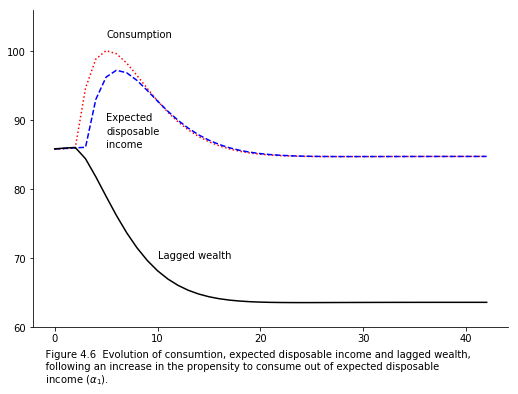

In [15]:
caption = '''
    Figure 4.6  Evolution of consumtion, expected disposable income and lagged wealth,
    following an increase in the propensity to consume out of expected disposable
    income ($\\alpha_1$).'''
vdata = [s['V'] for s in pcex1.solutions[8:]]
ydedata = [s['YDe'] for s in pcex1.solutions[8:]]
cdata = [s['C'] for s in pcex1.solutions[8:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(60, 106)

axes.plot(cdata, linestyle=':', color='r')
axes.plot(ydedata, linestyle='--', color='b')
axes.plot(vdata, color='k')

# add labels
plt.text(5, 102, 'Consumption')
plt.text(5, 90, 'Expected')
plt.text(5, 88, 'disposable')
plt.text(5, 86, 'income')
plt.text(10, 70, 'Lagged wealth')
fig.text(0.1, -.1, caption);


### Model PCEX2

In [16]:
def create_pcex2_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by the government')
    model.var('C', desc='Consumption goods')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('R', 'Interest rate on government bills')
    model.var('T', desc='Taxes')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')
    model.var('YDe', desc='Expected disposable income of households')
    model.var('alpha1', desc='Propensity to consume out of income')

    model.set_param_default(0)
    model.param('alpha2', desc='Propensity to consume out of wealth', default=0.6)
    model.param('alpha10', desc='Propensity to consume out of income - exogenous')
    model.param('iota', desc='Impact of interest rate on the propensity to consume out of income')
    model.param('lambda0', desc='Parameter in asset demand function', default=0.635)
    model.param('lambda1', desc='Parameter in asset demand function', default=5.0)
    model.param('lambda2', desc='Parameter in asset demand function', default=0.01)
    model.param('theta', desc='Tax rate', default=0.2)

    model.param('G', desc='Government goods')
    model.param('Rbar', desc='Interest rate as policy instrument')
    

    model.add('Y = C + G')  # 4.1
    model.add('YD = Y - T + R(-1)*Bh(-1)')  # 4.2
    model.add('T = theta*(Y + R(-1)*Bh(-1))')  #4.3, theta < 1
    model.add('V = V(-1) + (YD - C)')  # 4.4
    model.add('C = alpha1*YDe + alpha2*V(-1)')  # 4.5E
    model.add('Bd = Ve*lambda0 + Ve*lambda1*R - lambda2*YDe')  # 4.7E
    model.add('Hd = Ve - Bd')  # 4.13
    model.add('Ve = V(-1) + (YDe - C)')  # 4.14
    model.add('Hh = V - Bh')  # 4.6
    model.add('Bh = Bd')  # 4.15
    model.add('Bs - Bs(-1) = (G + R(-1)*Bs(-1)) - (T + R(-1)*Bcb(-1))')  # 4.8
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')  # 4.9
    model.add('Bcb = Bs - Bh')  # 4.10
    model.add('R = Rbar')  # 4.11
    model.add('YDe = YD(-1)')  # 4.16A
    model.add('alpha1 = alpha10 - iota*R(-1)')
        
    return model


In [17]:
pcex2 = create_pcex2_model()
pcex2.set_values({'Bcb': 21.576,
                  'Bh': 64.865,
                  'Bs': 86.441, # Bs = Bh + Bcb
                  'Hh': 21.62,
                  'Hs': 21.62,  # Hs = Hh
                  'R': 0.025,
                  'V': 86.485,  # V = Bh + Hh
                  'YD': 90,
                  'alpha1': 0.6,
                  'alpha2': 0.4,
                  'alpha10': 0.7,
                  'iota': 4,
                  'lambda0': 0.635,
                  'lambda1': 5,
                  'lambda2': 0.01,
                  'theta': 0.2,
                  'G': 20,
                  'Rbar': 0.025})

for i in range(15):
    pcex2.solve(iterations=100, threshold=1e-5)

# Introduce the rate shock
pcex2.parameters['Rbar'].value += 0.01

for i in range(40):
    pcex2.solve(iterations=100, threshold=1e-5)


###### Figure 4.9

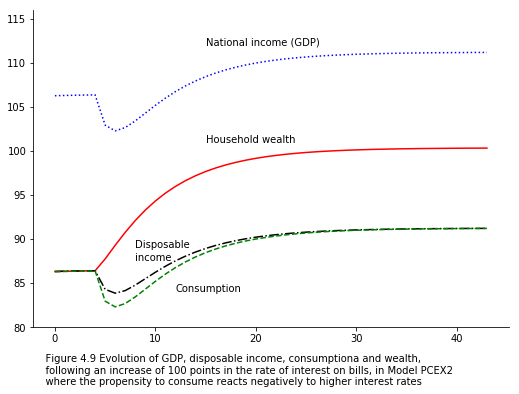

In [18]:
caption = '''
    Figure 4.9 Evolution of GDP, disposable income, consumptiona and wealth, 
    following an increase of 100 points in the rate of interest on bills, in Model PCEX2
    where the propensity to consume reacts negatively to higher interest rates'''

vdata = [s['V'] for s in pcex2.solutions[12:]]
ydata = [s['Y'] for s in pcex2.solutions[12:]]
yddata = [s['YD'] for s in pcex2.solutions[12:]]
cdata = [s['C'] for s in pcex2.solutions[12:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(80, 116)

axes.plot(ydata, linestyle=':', color='b')
axes.plot(vdata, linestyle='-', color='r')
axes.plot(yddata, linestyle='-.', color='k')
axes.plot(cdata, linestyle='--', color='g')

# add labels
plt.text(15, 112, 'National income (GDP)')
plt.text(15, 101, 'Household wealth')
plt.text(8, 89, 'Disposable')
plt.text(8, 87.5, 'income')
plt.text(12, 84, 'Consumption')
fig.text(0.1, -0.1, caption);


###### Figure 4.10

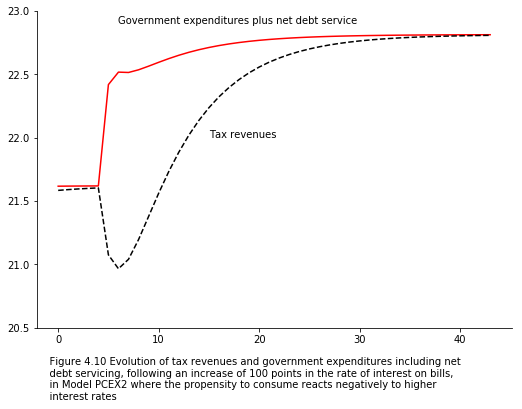

In [19]:
caption = '''
    Figure 4.10 Evolution of tax revenues and government expenditures including net
    debt servicing, following an increase of 100 points in the rate of interest on bills,
    in Model PCEX2 where the propensity to consume reacts negatively to higher
    interest rates'''

tdata = list()
sumdata = list()
for i in range(12, len(pcex2.solutions)):
    s = pcex2.solutions[i]
    s_1 = pcex2.solutions[i-1]
    sumdata.append( s['G'] + s_1['R']*s_1['Bh'])
    tdata.append(s['T'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(20.5, 23)

axes.plot(sumdata, linestyle='-', color='r')
axes.plot(tdata, linestyle='--', color='k')

# add labels
plt.text(6, 22.9, 'Government expenditures plus net debt service')
plt.text(15, 22, 'Tax revenues')
fig.text(0.1, -0.15, caption);
